In [146]:
import pandas as pd 
import numpy as np 
X_Train,y_train=pd.read_csv('spamTrain.csv'),pd.read_csv('spamTrainLabel.csv')
y_train=y_train.values.reshape(4000,)
X_Train=np.array(X_Train)

In [147]:
from sklearn.svm import SVC
np.random.seed(1)
idx = np.random.permutation(len(y_train))
X_Train,y_train = X_Train[idx] , y_train[idx]

In [148]:
model = SVC(C=0.1,degree=3)

In [149]:
model.fit(X_Train,y_train)


SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [150]:
x_test,y_test=pd.read_csv('spamTest.csv'),pd.read_csv('spamTestLabel.csv')
y_test=y_test.values.reshape(1000,)
x_test=np.array(x_test)
np.random.seed(2)
idx = np.random.permutation(len(y_test))
x_test,y_test = x_test[idx] , y_test[idx]

In [151]:
y_predicted_test=model.predict(x_test)
y_predicted_train=model.predict(X_Train)

In [152]:
acc_matrix=y_predicted_test==y_test
acc_matrix2=y_predicted_train==y_train


In [153]:
count=0
for i in range(len(acc_matrix)):
    if acc_matrix[i]:
        count+=1
count1=0
for i in range(len(acc_matrix2)):
    if acc_matrix2[i]:
        count1+=1
                

In [154]:
count , count1

(940, 3737)

In [155]:
def Indecies(email,vocablist):
    indecies=[]
    email=email.split(' ')
    for i in email:
        if i in vocablist:
            temp=vocablist.index(i)
            indecies.append(temp)
    return indecies
def Features_Vector(indecies):
    import numpy as np 
    vector_length=1899 #in our case only 
    vector=np.zeros((vector_length,1))
    vector[indecies]=1
    return vector
def Read(filename):
    file=open(filename,'r')
    content=file.read()
    content=content.split('	')
    file.close()
    return content
def remove_digits(list): 
    import re 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list] 
    return list
def remove_new_line_char(content):
    fun=lambda x: x.strip('\n')
    newContent=list(map(fun,content))
    newContent=newContent[1:]
    return newContent

In [181]:
content=Read('vocab.txt')
content=remove_digits(content)
content=remove_new_line_char(content)
email="free cours is now avilable available in our web site just sign up with your email and mobile number to get our offer do not forget to activate your account"

In [182]:
indecies=Indecies(email,content)
len(indecies)

26

In [183]:
features_Vector=Features_Vector(indecies)

In [184]:
features_Vector=features_Vector.reshape(1,1899)
y_predicted=model.predict(features_Vector)


In [185]:
classes=['not_spam','spam']
np.array(classes)[y_predicted]

array(['spam'], dtype='<U8')

In [24]:
from sklearn.metrics import accuracy_score , precision_score,f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
y_pred=model.predict(x_test)

f1_score(y_test, y_pred)*100

89.28571428571428

In [26]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves

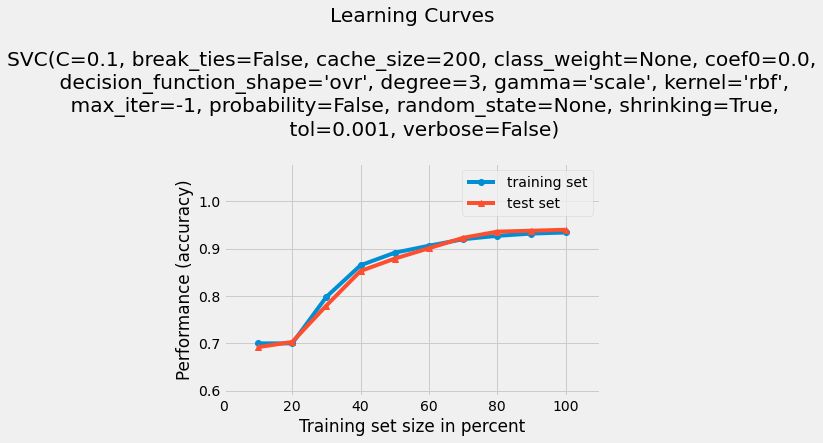

In [28]:
plot_learning_curves(X_Train,y_train,x_test,y_test,model,train_marker='o',test_marker='^',
                     suppress_plot=False,print_model=True,legend_loc='best',scoring='accuracy')
plt.show()

In [73]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [79]:
pca = PCA(n_components=10)
X_std = StandardScaler().fit_transform(X_Train)

principalComponents = pca.fit_transform(X_std)

([<matplotlib.axis.XTick at 0x15b1aebc6a0>,
 <a list of 10 Text major ticklabel objects>)

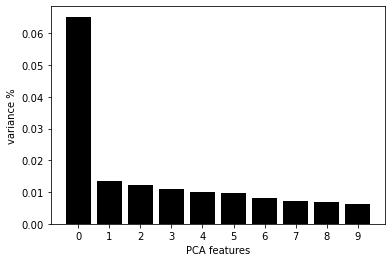

In [80]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [87]:
PCA_components = pd.DataFrame(principalComponents)

plt.scatter(PCA_components[0], PCA_components[1], alpha=.1,cmap='rainbow')


In [82]:
from sklearn.cluster import KMeans

In [88]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,0:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [89]:
kmeans=KMeans(n_clusters=2)

In [90]:
kmeans.fit(X_Train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [114]:
kmeans.predict([X_Train[37]])

array([0])

In [102]:
id=[]
for i in range(len(y_train)):
    if y_train[i]:
        id.append(i)

In [125]:
from sklearn.linear_model import LogisticRegressionCV

In [128]:
LG=LogisticRegressionCV(cv=5,Cs=[0.1 for i in range(5)])

In [129]:
LG.fit(X_Train,y_train)

LogisticRegressionCV(Cs=[0.1, 0.1, 0.1, 0.1, 0.1], class_weight=None, cv=5,
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=None, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [130]:
LG.predict(X_Train)==y_train

array([ True,  True,  True, ...,  True,  True,  True])

In [131]:
plot_learning_curves(X_Train,y_train,x_test,y_test,LG,train_marker='o',test_marker='^',
                     suppress_plot=False,print_model=True,legend_loc='best',scoring='f1')
plt.show()